In [0]:
import numpy as np
from numpy import matlib as matlab
import math
import scipy
from scipy.signal import lfilter
import matplotlib.pyplot as plt

### LMS

In [0]:
def identificador_LMS(x, d, L, mu, partida = [0 for n in range(0, 100)]): 
  #Obs: a inicialização da partida é uma gambiarra pra funcionar até 100 coeficientes... 

  nCoeffs = L
  partida = partida[0:L]

  # Construindo a matriz X dos coeficientes de x(n) ... x(n-L+1): 
  X = matlab.repmat(x.transpose(), nCoeffs, 1)
  for i in np.arange(0, nCoeffs): 
    X[i][:] = np.roll(X[i][:], [0, i-nCoeffs+1])
  X = X[:, 0:np.size(X, 1)-nCoeffs+1]

  # O mesmo com d(n)
  d = d[nCoeffs-1:d.size]
  
  # Inicialização do filtro 
  w_LMS = np.zeros((nCoeffs,1))
  w_LMS[:, 0] = partida

  # Inicialização da matriz que armazenará a evolução dos valores de w_SD
  w_LMS_hist = np.zeros((nCoeffs,X[0].size))

  for i in range(0, X[0].size): 
    y_LMS = np.dot(w_LMS.transpose(), X[:, i])
    e = d[i] - y_LMS;
    w_LMS = w_LMS + 2*mu*X[:, i].reshape(nCoeffs,1)*e;
    w_LMS_hist[:, i] = w_LMS.reshape(nCoeffs,)

  return w_LMS, w_LMS_hist

### Senoide de 50Hz

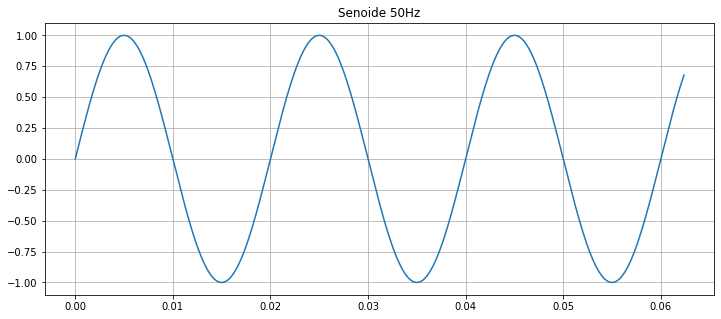

In [3]:
Fs = 8000
f = 50
x = np.arange(0,1,1/Fs) 

z = np.sin(2*np.pi*x*f)
plt.figure(figsize=(12,5))
plt.plot(x[:500],z[:500])
plt.title('Senoide 50Hz')
plt.grid(True)
plt.show()

### y[:100], 5, passo = 0.01

In [5]:
w1, w2 = identificador_LMS(z[:100],z, 5, 0.01)
ww1 = []
for i in range(len(w1)):
    ww1.append(float(w1[i]))
    
y1 = scipy.signal.lfilter(ww1,1,z)
print(ww1)

[0.2124294248729632, 0.20368318633357402, 0.1946228830841104, 0.18526248545547885, 0.1756164265023681]


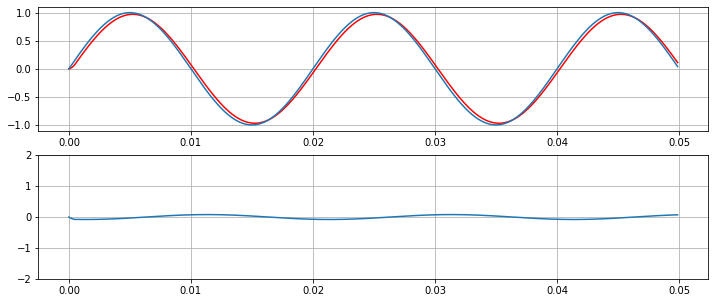

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(x[:400],y1[:400],'r')
plt.plot(x[:400],z[:400])
plt.grid()
plt.subplot(2,1,2)
plt.plot(x[:400], (y1-z)[:400])
plt.ylim(-2,2)
plt.grid()

###

In [8]:
w1, w2 = identificador_LMS(z[:200],z, 10, 0.001)
ww1 = []
for i in range(len(w1)):
    ww1.append(float(w1[i]))
    
y1 = scipy.signal.lfilter(ww1,1,z)
print(ww1)

[0.09382573424096104, 0.09235703375940336, 0.09074592542596005, 0.08899489345290562, 0.08710663780462545, 0.08508407003446561, 0.082930308795329, 0.0806486750309388, 0.07824268685518339, 0.07571605412744034]


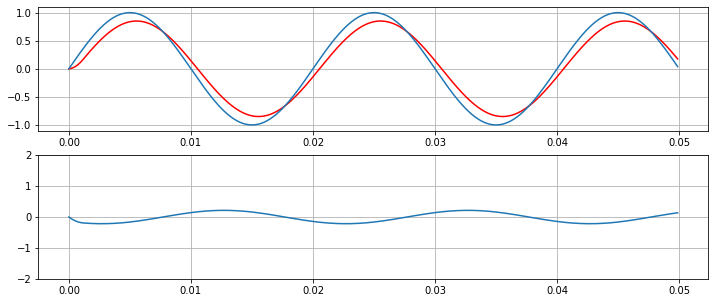

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(x[:400],y1[:400],'r')
plt.plot(x[:400],z[:400])
plt.grid()
plt.subplot(2,1,2)
plt.plot(x[:400], (y1-z)[:400])
plt.ylim(-2,2)
plt.grid()

###

In [11]:
w1, w2 = identificador_LMS(z[:200], z, 20, 0.02)
ww1 = []
for i in range(len(w1)):
    ww1.append(float(w1[i]))
    
y1 = scipy.signal.lfilter(ww1,1,z)
print(ww1)

[0.17187284694953114, 0.159834260899558, 0.14754922200429596, 0.13503667290328422, 0.12231590704030892, 0.10940653891431143, 0.09632847383525203, 0.0831018772315658, 0.06974714355653262, 0.05628486484150917, 0.04273579894450844, 0.02912083754308778, 0.015460973920896126, 0.0017772705975521764, -0.011909173148234031, -0.025577253812219786, -0.039205896204703446, -0.05277408594693942, -0.06626090187378732, -0.07964554829263182]


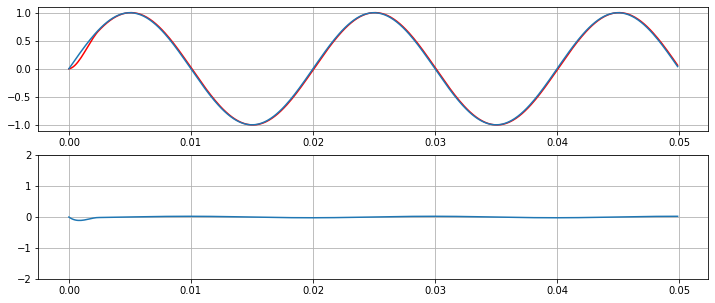

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(x[:400],y1[:400],'r')
plt.plot(x[:400],z[:400])
plt.grid()
plt.subplot(2,1,2)
plt.plot(x[:400], (y1-z)[:400])
plt.ylim(-2,2)
plt.grid()

### Aqui é um seno com ruído gaussiano

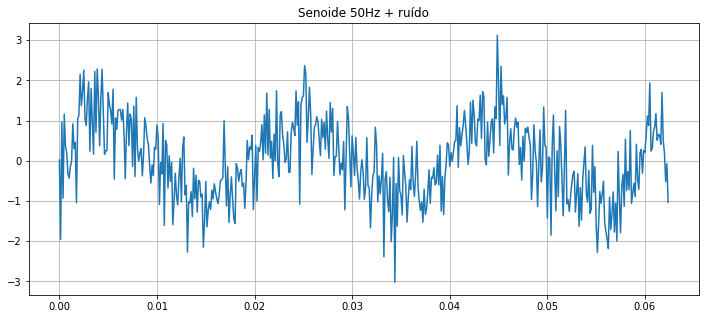

In [13]:
y = np.sin(2*np.pi*x*f) + np.sqrt(0.5)*np.random.randn(8000)
plt.figure(figsize=(12,5))
plt.plot(x[:500],y[:500])
plt.title('Senoide 50Hz + ruído')
plt.grid(True)
plt.show()

In [14]:
w1, w2 = identificador_LMS(y[:500], z, 50, 0.002)
ww1 = []
for i in range(len(w1)):
    ww1.append(float(w1[i]))
    
y1 = scipy.signal.lfilter(ww1,1,y)
print(ww1)

[0.02324914158244396, 0.02450081187137605, 0.024450915714045004, 0.025656705947129186, 0.021475161899329645, 0.02460865016452449, 0.02726754556611794, 0.02824743039789158, 0.03137290963459063, 0.030625459268646096, 0.03159409380425562, 0.03155788262040898, 0.031145008225016934, 0.03209028744450667, 0.0340595633536829, 0.03306091406673918, 0.029889765995050978, 0.03255075580285428, 0.03484407551555059, 0.03196129990982629, 0.03227506890830874, 0.02685954699964317, 0.023680948735034964, 0.02292888098004805, 0.02085967459717425, 0.020488818983347996, 0.02004777645296775, 0.018430296980216528, 0.014941742550333231, 0.013566445535638072, 0.012334577343535357, 0.010789491202325426, 0.012811492399570202, 0.012883870162745397, 0.009445567657796607, 0.0017776487875007007, -0.0024835707201717825, -0.005012536017277305, -0.0068117488709095505, -0.008967290734826824, -0.010369261082618667, -0.016911745161619383, -0.01957705326556559, -0.02306066558808539, -0.02267862222268846, -0.02363379383290383

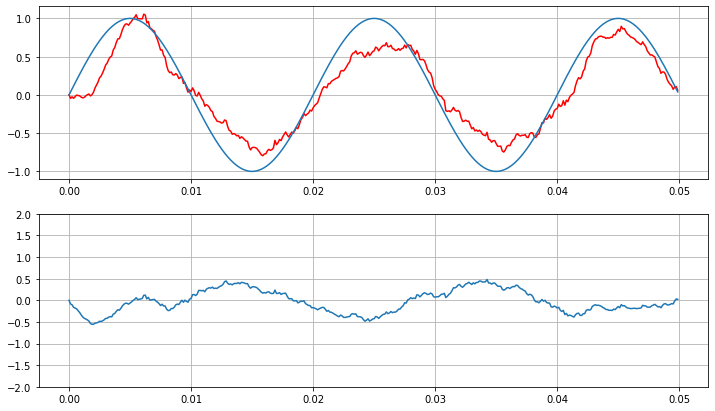

In [15]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(x[:400],y1[:400],'r')
plt.plot(x[:400],z[:400])
plt.grid()
plt.subplot(2,1,2)
plt.plot(x[:400], (y1-z)[:400])
plt.ylim(-2,2)
plt.grid()

###

In [16]:
w1, w2 = identificador_LMS(y[:400], z, 50, 0.0009)
ww1 = []
for i in range(len(w1)):
    ww1.append(float(w1[i]))
    
y1 = scipy.signal.lfilter(ww1,1,y)
print(ww1)

[0.05205706436031393, 0.052518922849215936, 0.05200017510028149, 0.05177571930444588, 0.04816294287114946, 0.04850882283611077, 0.04871919333013847, 0.048352794387213203, 0.04858494680563002, 0.04722968320012573, 0.046583902652718015, 0.04452167493368651, 0.0423255447008413, 0.041502765463334285, 0.040925587463705795, 0.039494567863238385, 0.03675867940325287, 0.036836593543483065, 0.03713988145522962, 0.03437010303217894, 0.03345852607162556, 0.029518891832671725, 0.026511533814131988, 0.025296532485210594, 0.022631289304636974, 0.021992618917643827, 0.02105264235338407, 0.018420286846163397, 0.0157383856757818, 0.014617908399274576, 0.01238126123190117, 0.010009783935990661, 0.009408642015851098, 0.008119889818716959, 0.00534679018682754, -0.0008817047527312167, -0.004881730389262323, -0.008135034918627677, -0.011061060679276471, -0.014092663809304176, -0.01635808671773393, -0.021487967348734743, -0.023936680362374518, -0.026758469640696926, -0.027744383514428796, -0.0288710005308060

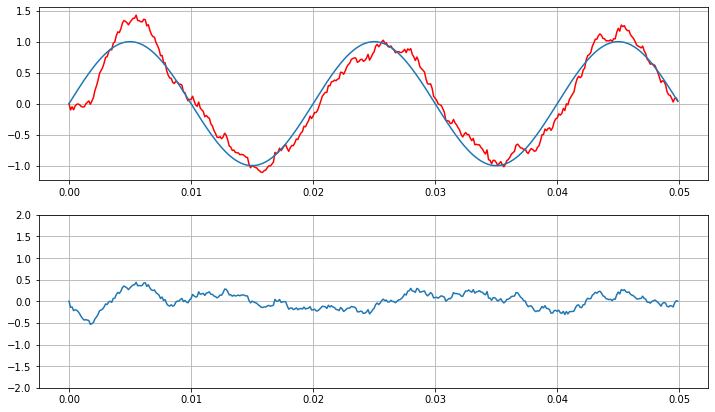

In [17]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(x[:400],y1[:400],'r')
plt.plot(x[:400],z[:400])
plt.grid()
plt.subplot(2,1,2)
plt.plot(x[:400], (y1-z)[:400])
plt.ylim(-2,2)
plt.grid()